In [1]:
%pylab inline
import pandas as pd 
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from collections import defaultdict
import pyclustertend

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('./data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', inplace=True, axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
gender = pd.get_dummies(df['Gender'])
df = pd.concat([df, gender], axis=1)
df.drop('Gender', inplace=True, axis=1)

In [119]:
# gender_encoder = preprocessing.LabelEncoder()
# df['Gender'] = gender_encoder.fit_transform(df['Gender'])

In [9]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
X = scaler.transform(df)

In [10]:
print(pyclustertend.hopkins(X, len(X) // 2))

0.11744179157477784


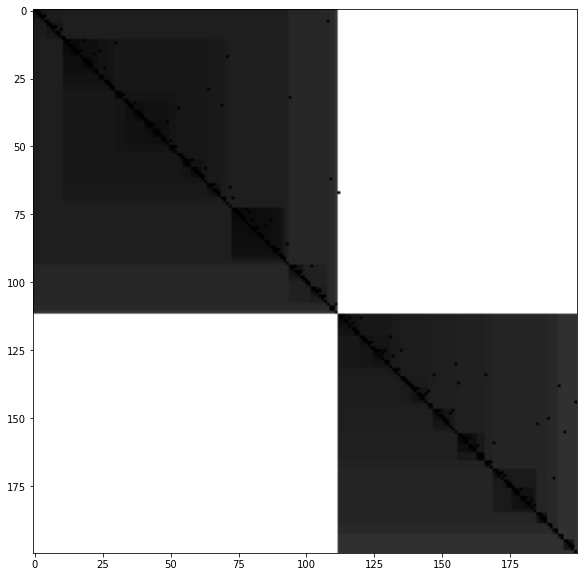

In [11]:
pyclustertend.ivat(X)

In [12]:
max_k = 40
inertias = []
scores = []
for k in range(2, max_k + 1):
    kmeans = cluster.KMeans(k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    clusters = kmeans.predict(X)
    scores.append(metrics.silhouette_score(X, clusters))

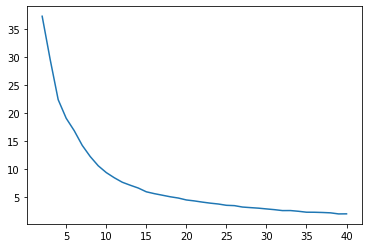

In [14]:
plt.plot(list(range(2, max_k + 1)), inertias)

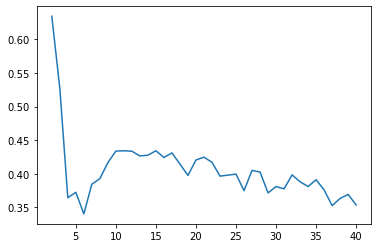

In [15]:
plt.plot(list(range(2, max_k + 1)), scores)

In [16]:
kmeans = cluster.KMeans(5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [17]:
clusters = kmeans.predict(X)

In [18]:
print(metrics.silhouette_score(X, clusters))

0.37073434917008075


In [19]:
clusters

array([2, 2, 3, 1, 1, 1, 3, 1, 4, 1, 4, 1, 3, 1, 0, 2, 3, 2, 4, 1, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 4, 1, 4, 2, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 4, 3, 4, 3, 4, 1, 4, 4, 2, 3, 3, 4, 2,
       3, 3, 2, 1, 4, 3, 3, 3, 4, 2, 3, 2, 1, 3, 4, 2, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 2, 4, 3, 1, 2, 3, 1, 4, 2, 1, 3, 4, 2, 4, 1, 3, 4, 4, 4,
       4, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 4, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 4, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       4, 2, 4, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int32)

In [20]:
original = scaler.inverse_transform(X)

In [21]:
for c in set(clusters):
    print('Means for cluster ', c)
    means = np.rint(np.mean(original[clusters == c], axis=0))
    print(means)

Means for cluster  0
[35. 82. 13.  0.  1.]
Means for cluster  1
[28. 60. 68.  1.  0.]
Means for cluster  2
[29. 61. 70.  0.  1.]
Means for cluster  3
[48. 59. 35.  1.  0.]
Means for cluster  4
[58. 53. 38.  0.  1.]


In [22]:
score = -1
best = None
eps_array = np.arange(0.5, 2, 0.1)
samples = range(5, (len(X) // 10) + 1)
for eps in eps_array:
    for ms in samples:
        dbscan = cluster.DBSCAN(eps=eps, min_samples=ms)
        clusters = dbscan.fit_predict(X)
        if len(set(clusters)) > 1:
            temp_score = metrics.silhouette_score(X, clusters)
            if temp_score > score:
                score = temp_score
                best = dbscan

In [23]:
best

DBSCAN()

In [24]:
score

0.6346497426496239

In [25]:
dbscan = cluster.DBSCAN(eps=best.eps, min_samples=best.min_samples)

In [26]:
clusters = dbscan.fit_predict(X)

In [27]:
clusters

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [28]:
import hdbscan

In [29]:
scanner = hdbscan.HDBSCAN()

In [30]:
scanner.fit(X)

HDBSCAN()

In [31]:
clusters = scanner.labels_

In [32]:
metrics.silhouette_score(X, clusters)

0.6346497426496239

In [33]:
clusters

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [36]:
original = scaler.inverse_transform(X)

In [37]:
np.mean(original[clusters == 0], axis=0)

array([39.80681818, 62.22727273, 48.51136364,  0.        ,  1.        ])

In [38]:
np.mean(original[clusters == 1], axis=0)

array([38.09821429, 59.25      , 51.52678571,  1.        ,  0.        ])